In [ ]:
#Problem 1
#The Air Quality Index (AQI) is an index for reporting daily air quality. It tells you how clean
or polluted your air is, and what associated health effects might be a concern for you. The
AQI focuses on health effects you may experience within a few hours or days after breathing
polluted air. The AQI is reported according to the Environmental Protection Agency's scale.
The Health Department obtains the pollen forecast from Pollen.com. Pollen forecasts are
based on a variety of environmental and seasonal factors, including past and current pollen
counts over the past 24 - 72 hours and the weather conditions. The pollen forecasts estimate
how much pollen an allergy sufferer is likely to be exposed to in the future. The pollen
forecast is currently reported on a scale of 0 to 12 as follows:

1: Explore the data by plotting AQI and Category across the years in two separate
plots. Make sure they have proper labels and titles. Use a datetime format for the dates.
a. How many times has the AQI been recorded above 120?
b. When did the Air Quality Index Category become unhealthy?

2: Which pollen type occurs the most? Hint: You can use a scatterplot if needed.

3:[Open-ended] Based on this data, do you think Nashville is a city that is
comfortable to live (based on the air quality and pollen only)? Why?

4: [A vectorization problem]. Compare the manual approach versus a vectorized
approach to find the mean AQI for each Air Quality Category ('Category' in the table).
For the vectorized method, you can use groupby() and mean() method in pandas datatype
(ex: data.groupby('ColumnName') and dataList.mean()). For the manual method, a
regular for-loop can be used. Calculate the time difference between the two approaches and
evaluate.

In [11]:
#Number 1 

import pandas as pd
import matplotlib.pyplot as plt

# Update the file path below as needed
data_path = '/Users/emirrahsanders/Downloads/Air_Quality_and_Pollen_Count.csv'
df = pd.read_csv(data_path)

print(df.head())

   OBJECTID   AQI  Category ResponsiblePollutant  PollenCount PollenType  \
0         1  47.0      Good                PM2.5          9.0    Juniper   
1         2  49.0      Good                PM2.5          1.0        Elm   
2         3  51.0  Moderate                PM2.5         11.0        Elm   
3         4  50.0      Good                PM2.5         10.0        Elm   
4         5  50.0      Good                PM2.5          2.0        Elm   

  PollenDescription          ReportDateTime  
0             Maple  2025/04/04 05:00:00+00  
1           Juniper  2025/04/03 05:00:00+00  
2           Juniper  2025/04/02 05:00:00+00  
3           Juniper  2025/04/01 05:00:00+00  
4           Juniper  2025/03/31 05:00:00+00  


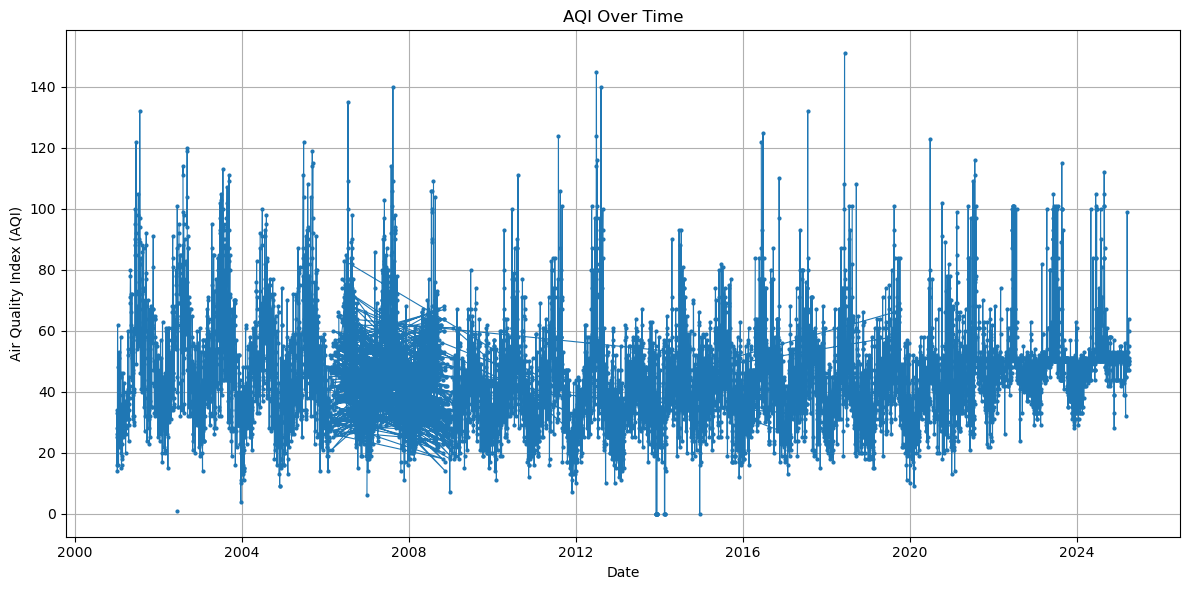

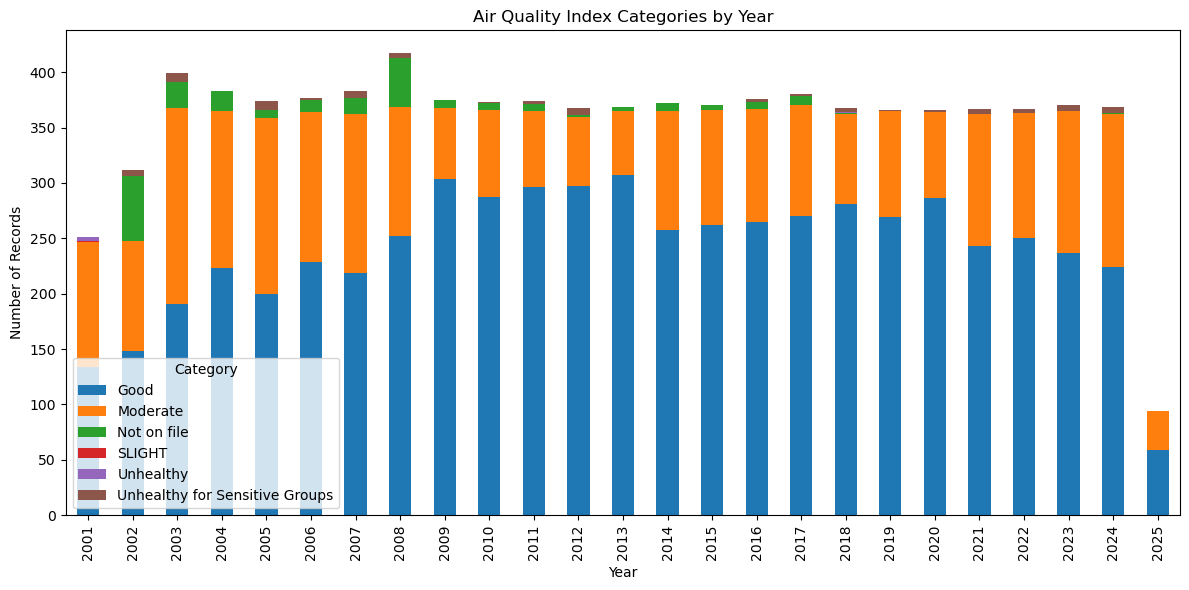

In [15]:

df['ReportDateTime'] = pd.to_datetime(df['ReportDateTime'], format='mixed')


plt.figure(figsize=(12, 6))
plt.plot(df['ReportDateTime'], df['AQI'], marker='o', linestyle='-', linewidth=0.8, markersize=2)
plt.xlabel("Date")
plt.ylabel("Air Quality Index (AQI)")
plt.title("AQI Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()


df['Year'] = df['ReportDateTime'].dt.year
category_counts = df.groupby(['Year', 'Category']).size().unstack(fill_value=0)

category_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.title("Air Quality Index Categories by Year")
plt.legend(title='Category')
plt.tight_layout()
plt.show()

In [17]:
#1a: There have been 14 cases recorded that were over 120 AQI. This was observed from the number of peaks in the graph.

#1b: According to the Air Quality Index graph, the air quality became bad in 2001. Compared to the other years where the air quality was measured, only in the year 2001 did it have a purple colored category that was coded for air quality that was considered bad. In the years 2002, 2003, 2005-2008, 2011, 2012, and 2016-2014, there were unhealthy air quality conditions for sensitive groups. 


The most common pollen type is: Grass (Count: 2330)
PollenType
Grass        2330
Ragweed       603
Cedar         405
Elm           398
Alder         291
Juniper       235
Birch         181
Maple         132
Hickory        88
Oak            15
Pine            3
Mulberry        2
Goldenrod       1
Poplar          1
Ash             1
Hackberry       1
Name: count, dtype: int64


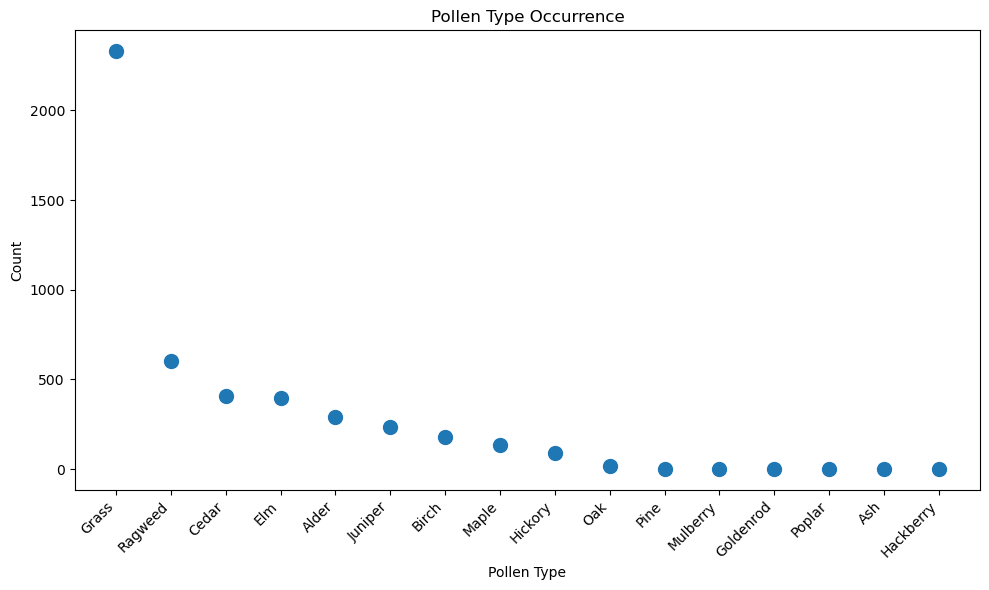

In [19]:
#2
# Count occurrences of each pollen type
pollen_counts = df['PollenType'].value_counts()
most_common = pollen_counts.idxmax()
most_common_count = pollen_counts.max()
print(f"The most common pollen type is: {most_common} (Count: {most_common_count})")
print(pollen_counts)

# Scatterplot: Pollen Type vs. Count
plt.figure(figsize=(10, 6))
plt.scatter(pollen_counts.index, pollen_counts.values, s=100)
plt.xlabel('Pollen Type')
plt.ylabel('Count')
plt.title('Pollen Type Occurrence')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#2: The most common pollen is grass. Grass had a 2330 pollen count, which is significantly higher compared to the other pollen types. 

In [31]:
#3: Based on the data, Nashville appears to be a city where people could live comfortably based on air quality but due to the pollen type of grass being the most common type of pollen, I would assume that, based on pollen during certain seasons, it may make it uncomfortable for people

In [27]:
#4: start_manual = time.time()
import time 

# Manual calculation 
start_manual = time.time()
category_means_manual = {}
for cat in df['Category'].unique():
    mean_val = df[df['Category'] == cat]['AQI'].mean()
    category_means_manual[cat] = mean_val
end_manual = time.time()
manual_time = end_manual - start_manual

print("Manual means:", category_means_manual)
print(f"Manual computation time: {manual_time:.6f} seconds")

# Vectorized calculation 
start_vec = time.time()
category_means_vectorized = df.groupby('Category')['AQI'].mean().to_dict()
end_vec = time.time()
vectorized_time = end_vec - start_vec

print("Vectorized means:", category_means_vectorized)
print(f"Vectorized computation time: {vectorized_time:.6f} seconds")

Manual means: {'Good': 36.966282757469536, 'Moderate': 62.240839694656486, 'Not on file': nan, 'Unhealthy for Sensitive Groups': 110.07894736842105, 'Unhealthy': 127.5, 'SLIGHT': 60.0}
Manual computation time: 0.008051 seconds
Vectorized means: {'Good': 36.966282757469536, 'Moderate': 62.240839694656486, 'Not on file': nan, 'SLIGHT': 60.0, 'Unhealthy': 127.5, 'Unhealthy for Sensitive Groups': 110.07894736842105}
Vectorized computation time: 0.003400 seconds
